In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
output_path = '../tables_figures/'
input_path = 'output_instrinic_evaluation_large.pkl'

In [24]:
df = pd.read_pickle(input_path)
df.reset_index(inplace=True)
df.rename(columns={'index':'model'}, inplace=True) 


def rename_models(x):
    variable_name = x
    if x == 'w2v_model_nr_5_window_10_size_300_negsample_5':
        variable_name = 'w2v 5 (w = 10, d = 300, ns = 5)'
    if x =='w2v_model_nr_1_window_5_size_300_negsample_5':
        variable_name = 'w2v 1 (w = 5, d = 300, ns = 5)'
    if x == 'w2v_model_nr_8_window_47615_size_100_negsample_5':
        variable_name = 'w2v 8 (w = sentence, d = 100, ns = 5)'
    if x =='w2v_model_nr_11_window_47615_size_300_negsample_15':
        variable_name = 'w2v 11 (w = sentence, d = 300, ns = 15)'
    if x =='w2v_model_nr_4_window_10_size_100_negsample_5':
        variable_name = 'w2v 4 (w = 10, d = 100, ns = 5)'
    if x == 'w2v_model_nr_9_window_47615_size_300_negsample_5':
        variable_name = 'w2v 9 (w = sentence, d = 300, ns = 5)'
    if x == 'w2v_model_nr_3_window_5_size_300_negsample_15':
        variable_name = 'w2v 3 (w = 5, d = 300, ns = 15)'
    if x == 'w2v_model_nr_10_window_47615_size_100_negsample_15':
        variable_name = 'w2v 10 (w = sentence, d = 100, ns = 15)'
    if x == 'w2v_model_nr_7_window_10_size_300_negsample_15':
        variable_name = 'w2v 7 (w = 10, d = 100, ns = 15)'
    if x == 'w2v_model_nr_6_window_10_size_100_negsample_15':
        variable_name = 'w2v 6 (w = 10, d = 100, ns = 15)'
    if x == 'w2v_model_nr_2_window_5_size_100_negsample_15':
        variable_name = 'w2v 2 (w = 5, d = 100, ns = 15)'
    if x == 'w2v_model_nr_0_window_5_size_100_negsample_5':
        variable_name = 'w2v 0 (w = 5, d = 100, ns = 5)'
    if x == 'baseline':
        variable_name = 'baseline model'
    if x == 'wiki.nl.vec':
        variable_name = 'pre-trained 01: Wiki FastText'
    if x == 'cow-320.txt':
        variable_name = 'pre-trained 02: COW small'
    return variable_name

df['model'] = df['model'].map(rename_models)

# combine syntatic and semantic categories

df['syntactic'] = ( df['comparative'] + df['pasttense'] + df['diminutives'] + df['infinitive'] + df['plural'] + df['superlative'] ) / 6
df['semantic'] = ( df['country'] + df['currency'] + df['gender'] + df['nationalities'] + df['opposites'] ) / 5

df = df[['model', 'syntactic' , 'semantic', 'total' ]]

df = pd.melt(df, id_vars=['model'], value_vars=[ 'syntactic' , 'semantic', 'total'], value_name='intrinsic')


In [16]:
model = df['model']
color = ['blue' if x.startswith('w2v') else 'red' for x in model]

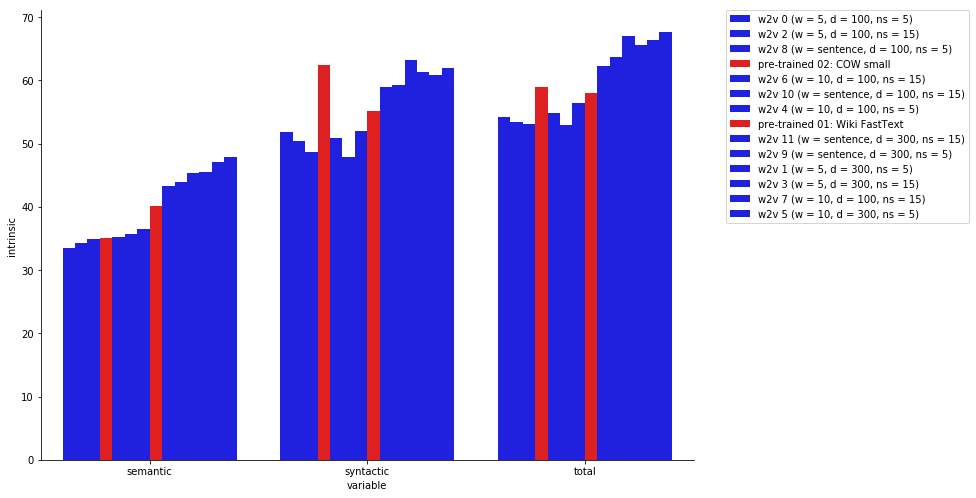

In [27]:
df = df.sort_values(['intrinsic', 'variable', 'model'])
fig, ax = plt.subplots()


sns.barplot(x='variable', y='intrinsic', hue='model', palette = color, data=df)   

sns.despine()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.set_size_inches(11.7, 8.27)
fig.savefig("{}intrinsic_output.png".format(output_path),  bbox_inches = 'tight')

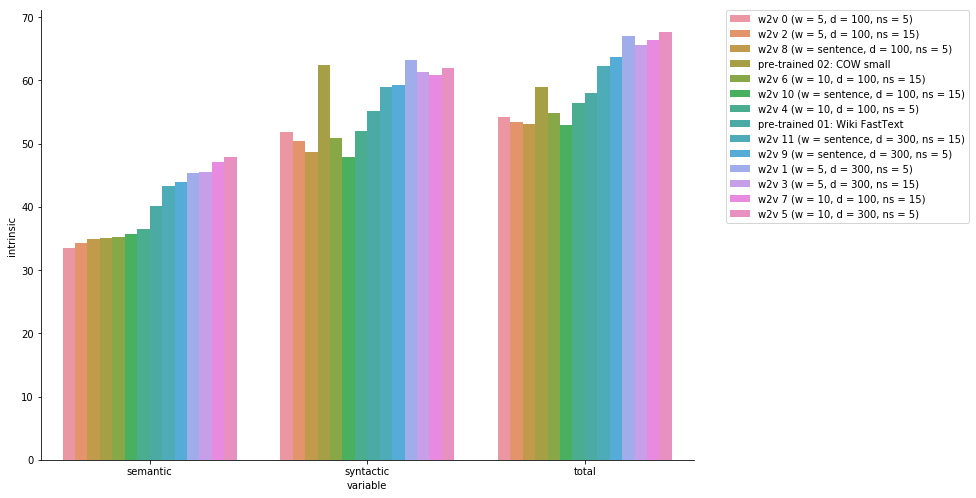

In [28]:
df = df.sort_values(['intrinsic', 'variable', 'model'])
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.barplot(x='variable', y='intrinsic', hue='model', data=df)   

sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.savefig("{}intrinsic_output_2.png".format(output_path),  bbox_inches = 'tight')